# Context of Data :

(i) Company - UK-based and registered non-store online retail.

(ii) Products for selling - Mainly all-occasion gifts.

(iii) Customers - Most are wholesalers (local or international). 

(iv) Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year).

# Problem Statements : 

# 1. Perform Basic EDA :

# Importing libraries and data :

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import pylab as pylb
import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()

In [67]:
df=pd.read_csv("E:\Python Assignment 2_BI\Ecommerce - UK Retailer.csv")
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# (a). Boxplot – All Numeric Variables.

<AxesSubplot:xlabel='Quantity'>

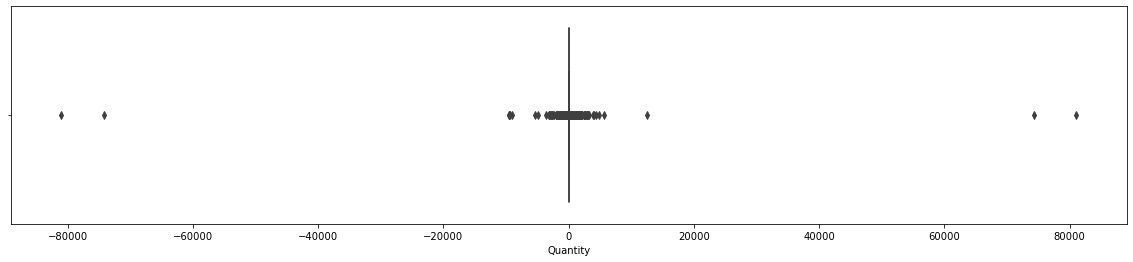

In [69]:
plt.figure(figsize=(20,4))
sns.boxplot(x="Quantity",data=df)

<AxesSubplot:xlabel='UnitPrice'>

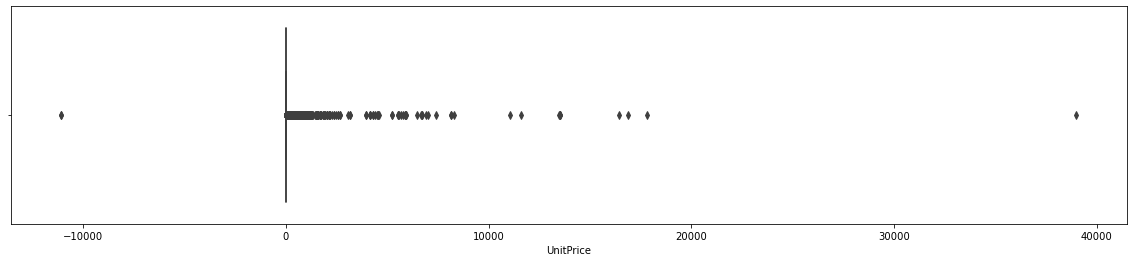

In [70]:
plt.figure(figsize=(20,4))
sns.boxplot(x="UnitPrice",data=df)

<AxesSubplot:xlabel='CustomerID'>

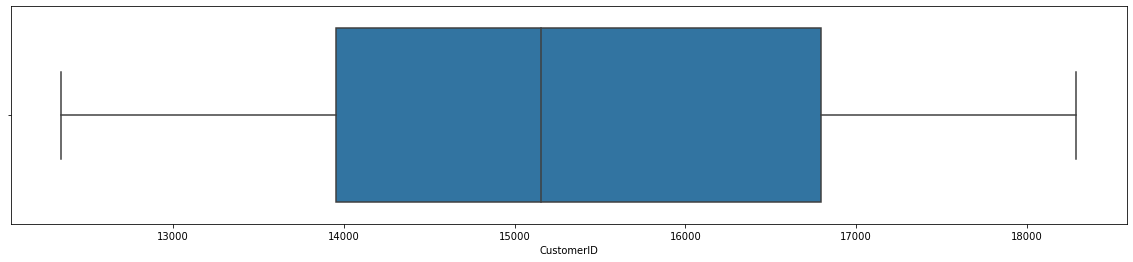

In [71]:
plt.figure(figsize=(20,4))
sns.boxplot(x="CustomerID",data=df)

# (b). Histogram – All Numeric Variables.

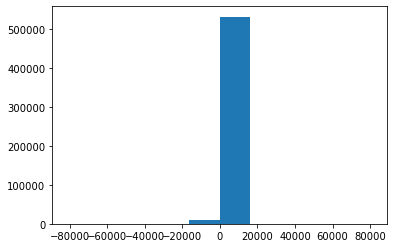

In [72]:
fig,ax=plt.subplots()
ax.hist(df["Quantity"])
plt.show()

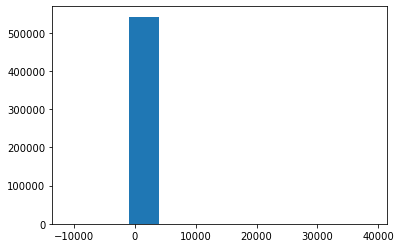

In [73]:
fig,ax=plt.subplots()
ax.hist(df["UnitPrice"])
plt.show()

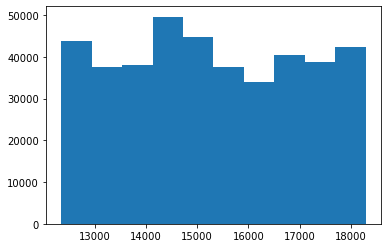

In [74]:
fig,ax=plt.subplots()
ax.hist(df["CustomerID"])
plt.show()

# (c). Distribution Plot – All Numeric Variables.

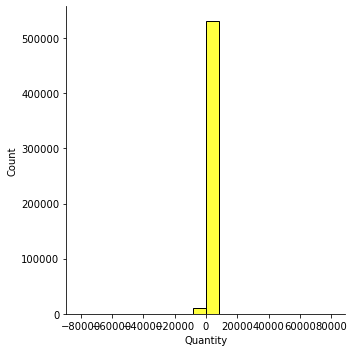

In [75]:
sns.displot(df["Quantity"],kde=False,color="Yellow",bins=20)

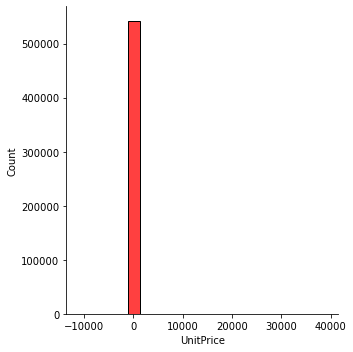

In [76]:
sns.displot(df["UnitPrice"],kde=False,color="Red",bins=20)

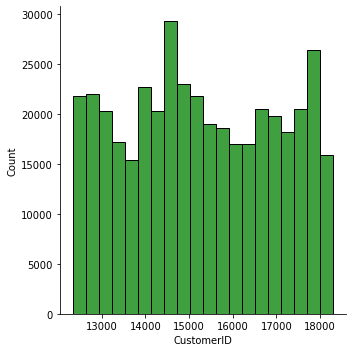

In [77]:
sns.displot(df["CustomerID"],kde=False,color="Green",bins=20)

# (d). Aggregation for all numerical Columns.

In [78]:
df.aggregate({"Quantity":["sum","max","min"], "UnitPrice":["sum","max","min"], "CustomerID":["sum","max","min"]})

Quantity    UnitPrice    CustomerID
sum   5176450  2498803.974  6.219476e+09
max     80995    38970.000  1.828700e+04
min    -80995   -11062.060  1.234600e+04

# (e). Unique Values across all columns.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [80]:
df.InvoiceNo.unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [81]:
df.StockCode.unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [82]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [83]:
df.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [84]:
df.InvoiceDate.unique()

array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      dtype=object)

In [85]:
df.UnitPrice.unique()

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

In [86]:
df.CustomerID.unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [87]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

# (f). Duplicate values across all columns.

In [88]:
duplicate_df = df[df.duplicated()]
duplicate_df

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 11:45       1.25     17908.0  United Kingdom  
527     12/1/2010 11:45       2.10     17908.0  United Kingdom  
537     12/1/2010 11:45       2.95     17908.0  United Kingdom  
539     12/1/2010 11:45       4.95     17908.0  United Kingdom  
555     12/1/2010 11:49       2.95     17920.0  United Kingdom  
...                 ...        ...         ...             ...  
541675  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541689  12/9/2011 11:34       2.49     14446.0  United Kingdom  
541692  12/9/2011 11:34       1.95     14446.0  United Kingdom  
541699  12/9/2011 11:34       2.10     14446.0  United Kingdom  
541701  12/9/2011 11:34       2.08     14446.0  United Kingdom  

[5268 rows x 8 columns]

# (g). Correlation – Heatmap - All Numeric Variables.

In [89]:
print(df.corr())

            Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.001235    -0.00360
UnitPrice  -0.001235   1.000000    -0.00456
CustomerID -0.003600  -0.004560     1.00000


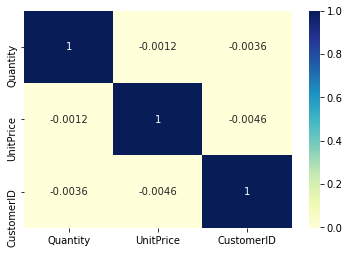

In [90]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# (h). Regression Plot - All Numeric Variables.

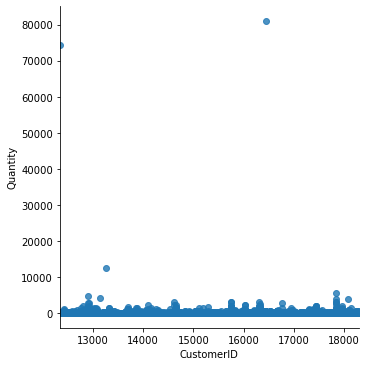

In [122]:
sns.lmplot(x="CustomerID",y="Quantity", data=df)

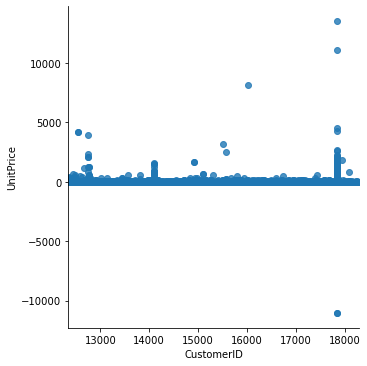

In [123]:
sns.lmplot(x="CustomerID",y="UnitPrice", data=df)

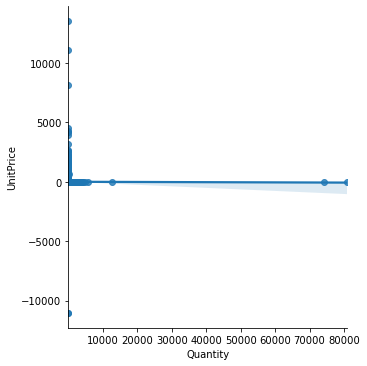

In [124]:
sns.lmplot(x="Quantity",y="UnitPrice", data=df)

# (i). Bar Plot – Every Categorical Variable vs every Numerical Variable.

In [91]:
numerical_variable = df.select_dtypes(include=[np.number])
numerical_variable

Quantity  UnitPrice  CustomerID
0              6       2.55     17850.0
1              6       3.39     17850.0
2              8       2.75     17850.0
3              6       3.39     17850.0
4              6       3.39     17850.0
...          ...        ...         ...
541904        12       0.85     12680.0
541905         6       2.10     12680.0
541906         4       4.15     12680.0
541907         4       4.15     12680.0
541908         3       4.95     12680.0

[541909 rows x 3 columns]

In [92]:
categorical_variable = df.select_dtypes(exclude=[np.number])
categorical_variable

InvoiceNo StockCode                          Description  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1         536365     71053                  WHITE METAL LANTERN   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...          ...       ...                                  ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

            InvoiceDate         Country  
0        12/1/2010 8:26  United Kingdom  
1        12/1/2010 8:26  United Kingdom  
2        12/1/2010 8:26  United Kingdom  
3        12/1/2010 8:26  United Kingdom  
4        12/1/2010 8:26  United Kingdom  
...                 ...             ...  
541904  12/9/2011 12:50          France  
541905  12/9/2011 12:50          France  
541906  12/9/2011 12:50          France  
541907  12/9/2011 12:50          France  
541908  12/9/2011 12:50          France  

[541909 rows x 5 columns]

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="InvoiceNo", y="Quantity", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="StockCode", y="Quantity", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="Description", y="Quantity", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="InvoiceDate", y="Quantity", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="Country", y="Quantity", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="InvoiceNo", y="UnitPrice", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="StockCode", y="UnitPrice", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="Description", y="UnitPrice", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="InvoiceDate", y="UnitPrice", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="Country", y="UnitPrice", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="InvoiceNo", y="CustomerID", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="StockCode", y="CustomerID", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="Description", y="CustomerID", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="InvoiceDate", y="CustomerID", data=df)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="Country", y="CustomerID", data=df)

# (j). Pair plot - All Numeric Variables. 

In [ ]:
sns.pairplot(df)
plt.show()

# (k). Line chart to show the trend of data - All Numeric/Date Variables.

In [ ]:
plt.plot(df.UnitPrice, df.Quantity)
plt.xlabel("X-axis_UnitPrice")
plt.ylabel("Y-axis_Quantity")
plt.title("Title")
plt.show()

In [ ]:
plt.plot(df.CustomerID, df.Quantity)
plt.xlabel("X-axis_CustomerID")
plt.ylabel("Y-axis_Quantity")
plt.title("Title")
plt.show()

In [ ]:
plt.plot(df.CustomerID, df.UnitPrice)
plt.xlabel("X-axis_CustomerID")
plt.ylabel("Y-axis_UnitPrice")
plt.title("Title")
plt.show()

# (l). Plot the skewness - All Numeric Variables. 

In [ ]:
x1 = np.df
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  )  
pylb.plot(x1, y1, '*')  
print("\nSkewness for data :", skew(y1))

# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode).

In [93]:
df.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [94]:
df["Description"].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [95]:
df["Description"].fillna(df["Description"].mode()[0],inplace=True)

In [96]:
df["CustomerID"].mode()

0    17841.0
dtype: float64

In [97]:
df["CustomerID"].fillna(df["CustomerID"].mode()[0],inplace=True)

In [98]:
df.isna().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# 3. Remove duplicate rows.

In [99]:
df.duplicated().sum()

5268

In [100]:
df=df.drop_duplicates()
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[536641 rows x 8 columns]

In [101]:
df.duplicated().sum()

0

# 4. Remove rows which have negative values in Quantity column.

In [102]:
df.shape

(536641, 8)

In [103]:
df[df["Quantity"]<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0  United Kingdom  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom  
235     12/1/2010 10:24       1.65     17548.0  United Kingdom  
236     12/1/2010 10:24       0.29     17548.0  United Kingdom  
237     12/1/2010 10:24       0.29     17548.0  United Kingdom  
...                 ...        ...         ...             ...  
540449   12/9/2011 9:57       0.83     14397.0  United Kingdom  
541541  12/9/2011 10:28     224.69     15498.0  United Kingdom  
541715  12/9/2011 11:57      10.95     15311.0  United Kingdom  
541716  12/9/2011 11:58       1.25     17315.0  United Kingdom  
541717  12/9/2011 11:58       1.25     17315.0  United Kingdom  

[10587 rows x 8 columns]

In [104]:
df.drop(df[df["Quantity"]<0].index,inplace=True)

In [105]:
df.shape

(526054, 8)

# 5. Add the columns - Month, Day and Hour for the invoice.

In [106]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [107]:
df["InvoiceDate"]=pd.to_datetime(df.InvoiceDate,format="%m/%d/%Y %H:%M")

In [108]:
df.insert(loc=2, column='Year_month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))

In [109]:
df["Month"]=df["InvoiceDate"].dt.month
df["Day"]=df["InvoiceDate"].dt.dayofweek
df["Hour"]=df["InvoiceDate"].dt.hour

In [110]:
df.head()

InvoiceNo StockCode  Year_month                          Description  \
0    536365    85123A      201012   WHITE HANGING HEART T-LIGHT HOLDER   
1    536365     71053      201012                  WHITE METAL LANTERN   
2    536365    84406B      201012       CREAM CUPID HEARTS COAT HANGER   
3    536365    84029G      201012  KNITTED UNION FLAG HOT WATER BOTTLE   
4    536365    84029E      201012       RED WOOLLY HOTTIE WHITE HEART.   

   Quantity         InvoiceDate  UnitPrice  CustomerID         Country  Month  \
0         6 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12   
1         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12   
2         8 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12   
3         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12   
4         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12   

   Day  Hour  
0    2     8  
1    2     8  
2    2     8  
3    2     8  
4    2     8

# 6. How many orders made by the customers?

In [111]:
df.groupby(["CustomerID"],as_index=False)["InvoiceNo"].count().head()

CustomerID  InvoiceNo
0     12346.0          1
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [ ]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

# 7. TOP 5 customers with higher number of orders.

In [112]:
df["CustomerID"].value_counts().head(5)

17841.0    140998
14911.0      5672
14096.0      5111
12748.0      4413
14606.0      2677
Name: CustomerID, dtype: int64

# 8. How much money spent by the customers? 

In [113]:
df["Price"]=df["UnitPrice"]*df["Quantity"]

In [114]:
from numpy import sum
df.groupby(["CustomerID"]).agg({"Price":sum})

Price
CustomerID          
12346.0     77183.60
12347.0      4310.00
12348.0      1797.24
12349.0      1757.55
12350.0       334.40
...              ...
18280.0       180.60
18281.0        80.82
18282.0       178.05
18283.0      2045.53
18287.0      1837.28

[4339 rows x 1 columns]

In [ ]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amount_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# 9. TOP 5 customers with highest money spent. 

In [115]:
df.groupby(["CustomerID"]).agg({"Price":sum}).sort_values(by="Price",ascending=False).head()

Price
CustomerID              
17841.0     1.773298e+06
14646.0     2.802060e+05
18102.0     2.596573e+05
17450.0     1.943908e+05
16446.0     1.684725e+05

# 10. How many orders per month?

In [116]:
df.groupby(["InvoiceNo"])["Year_month"].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[201012]    1629
[201101]    1120
[201102]    1126
[201103]    1531
[201104]    1318
[201105]    1731
[201106]    1576
[201107]    1540
[201108]    1409
[201109]    1896
[201110]    2129
[201111]    2884
[201112]     839
Name: Year_month, dtype: int64

In [ ]:
ax = df.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

# 11. How many orders per day?

In [117]:
df.groupby(["InvoiceNo"])["Day"].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[0]    3237
[1]    3717
[2]    3865
[3]    4408
[4]    3294
[6]    2207
Name: Day, dtype: int64

In [ ]:
ax = df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

# 12. How many orders per hour?

In [ ]:
a=df['Hour'].value_counts().sort_index()

In [118]:
df.groupby(["InvoiceNo"])["Hour"].unique().value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[12]        3322
[13]        2818
[14]        2557
[15]        2474
[11]        2472
[10]        2431
[9]         1538
[16]        1406
[17]         738
[8]          568
[18]         209
[19]         146
[7]           29
[20]          18
[11, 12]       1
[6]            1
Name: Hour, dtype: int64

In [ ]:
ax= df.groupby('InvoiceNo')["Hour"].unique().value_counts().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,22), rotation='horizontal', fontsize=15)
plt.show()

# 13. How many orders for each country? 

In [119]:
df.groupby(["Country"])["InvoiceNo"].count().sort_values()

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  280
Israel                     292
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                442
Sweden                     450
Cyprus                     603
Finland                    685
Channel Islands            747
Italy                      758
Norway                    1072
Australia                 1184
Portugal                  1492
Switzerland               1959
Belgium                   2031


In [ ]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']
# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

# 14. Orders trend across months.

In [120]:
df.groupby(["Month"])["InvoiceNo"].count().sort_values()

Month
2     26961
4     28957
1     34104
8     34347
3     35609
6     35793
5     36044
7     38466
9     48962
10    58629
12    66049
11    82133
Name: InvoiceNo, dtype: int64

# 15. How much money spent by each country? 

In [121]:
df.groupby(["Country"]).agg({"Price":sum})

Price
Country                           
Australia             1.384538e+05
Austria               1.019868e+04
Bahrain               7.541400e+02
Belgium               4.119634e+04
Brazil                1.143600e+03
Canada                3.666380e+03
Channel Islands       2.044054e+04
Cyprus                1.350285e+04
Czech Republic        8.267400e+02
Denmark               1.895534e+04
EIRE                  2.831405e+05
European Community    1.300250e+03
Finland               2.254608e+04
France                2.096254e+05
Germany               2.286784e+05
Greece                4.760520e+03
Hong Kong             1.548300e+04
Iceland               4.310000e+03
Israel                8.129410e+03
Italy                 1.748324e+04
Japan                 3.741637e+04
Lebanon               1.693880e+03
Lithuania             1.661060e+03
Malta                 2.725590e+03
Netherlands           2.854463e+05
Norway                3.616544e+04
Poland                7.334650e+03
Portugal              3.368305e+04
RSA                   1.002310e+03
Saudi Arabia          1.459200e+02
Singapore             2.127929e+04
Spain                 6.155856e+04
Sweden                3.836783e+04
Switzerland           5.706760e+04
USA                   3.580390e+03
United Arab Emirates  1.902280e+03
United Kingdom        8.979620e+06
Unspecified           4.740940e+03

In [ ]:
group_country_amount_spent = df.groupby('Country')['Amount_Spent'].sum().sort_values()
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()